# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "ACCESS1-0"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-process/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/huss_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.4884324073791504 to load the data
*********Start to merge*********
It takes elapsed_time 0.034888267517089844 to merge the time series
*********Start to build the regridder*********
Create weight file: patch_145x192_192x288_peri.nc
It takes elapsed_time 18.34341263771057 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.898670673370361 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6705937385559082 to mask the layer
*********Start to plot the layer*********


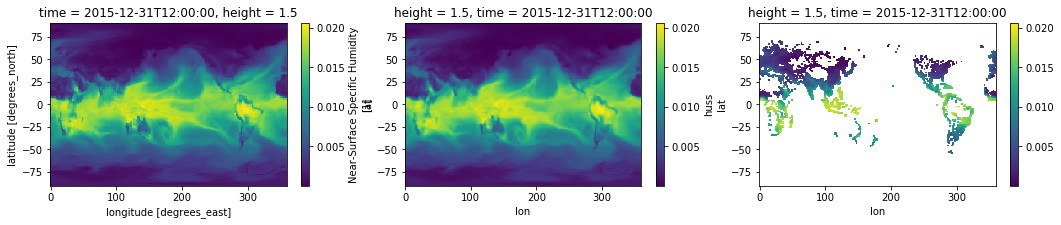

It takes elapsed_time 0.7515695095062256 to plot the layer
It takes elapsed_time 32.189335346221924 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/tas_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.619187593460083 to load the data
*********Start to merge*********
It takes elapsed_time 0.051313161849975586 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.028186559677124023 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.945168733596802 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6537282466888428 to mask the layer
*********Start to plot the layer*********


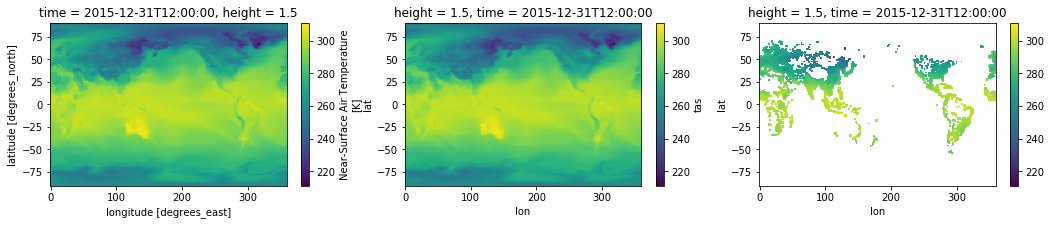

It takes elapsed_time 0.6801431179046631 to plot the layer
It takes elapsed_time 13.979243993759155 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/uas_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.1860854625701904 to load the data
*********Start to merge*********
It takes elapsed_time 0.03768277168273926 to merge the time series
*********Start to build the regridder*********
Create weight file: patch_144x192_192x288_peri.nc
It takes elapsed_time 18.347363233566284 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.842445373535156 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6615025997161865 to mask the layer
*********Start to plot the layer*********


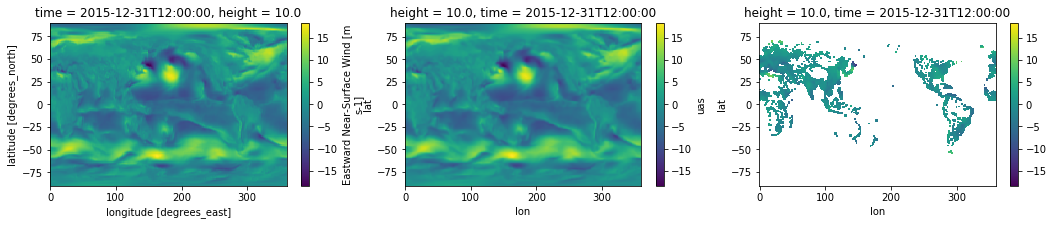

It takes elapsed_time 0.7289655208587646 to plot the layer
It takes elapsed_time 31.804980278015137 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/vas_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.5277938842773438 to load the data
*********Start to merge*********
It takes elapsed_time 0.03801774978637695 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.025897979736328125 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.82505178451538 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6571986675262451 to mask the layer
*********Start to plot the layer*********


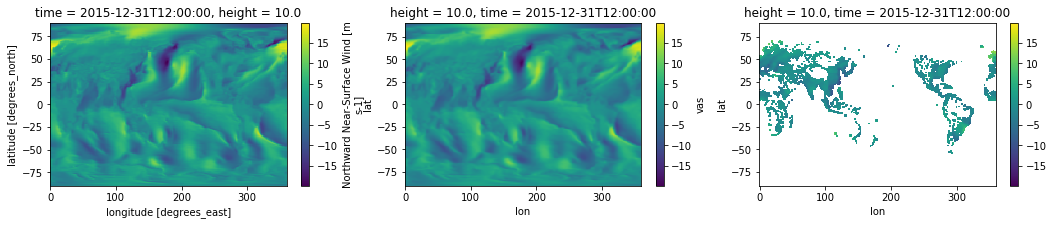

It takes elapsed_time 0.7458062171936035 to plot the layer
It takes elapsed_time 13.820973634719849 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/pr_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.9098103046417236 to load the data
*********Start to merge*********
It takes elapsed_time 0.03634500503540039 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.02630782127380371 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.95205807685852 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6603422164916992 to mask the layer
*********Start to plot the layer*********


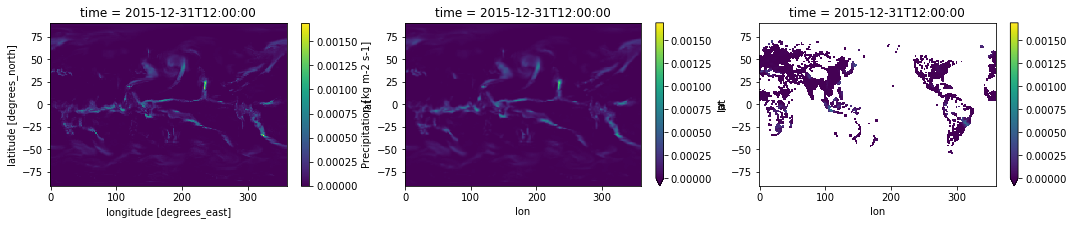

It takes elapsed_time 0.673194408416748 to plot the layer
It takes elapsed_time 13.258747577667236 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/prsn_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.153359889984131 to load the data
*********Start to merge*********
It takes elapsed_time 0.03707432746887207 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.026257991790771484 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.90474796295166 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6693639755249023 to mask the layer
*********Start to plot the layer*********


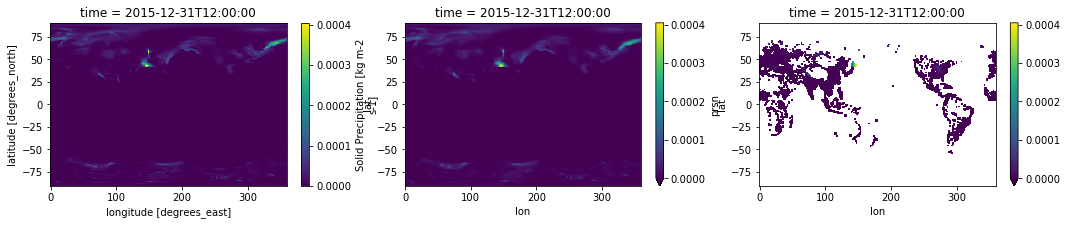

It takes elapsed_time 0.6446616649627686 to plot the layer
It takes elapsed_time 13.436500787734985 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/rlds_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.898242473602295 to load the data
*********Start to merge*********
It takes elapsed_time 0.033074378967285156 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.025198936462402344 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.921995639801025 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6714520454406738 to mask the layer
*********Start to plot the layer*********


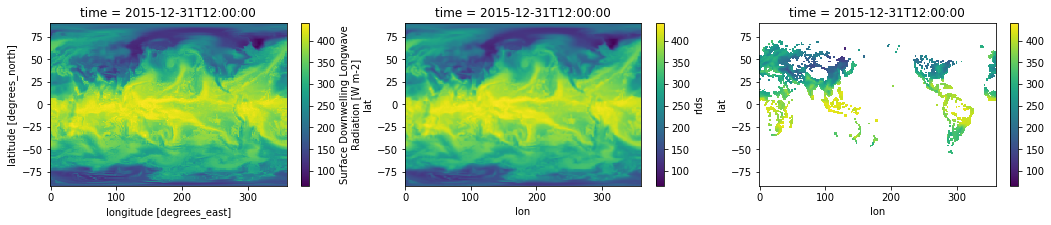

It takes elapsed_time 0.710193395614624 to plot the layer
It takes elapsed_time 13.260861158370972 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/rlus_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.957991123199463 to load the data
*********Start to merge*********
It takes elapsed_time 0.03158998489379883 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.025690317153930664 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.878924131393433 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6680178642272949 to mask the layer
*********Start to plot the layer*********


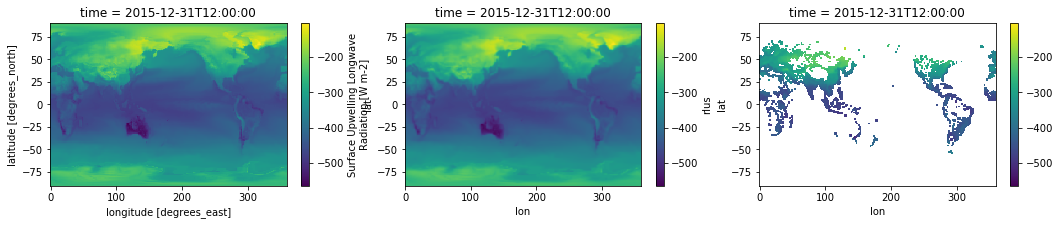

It takes elapsed_time 0.6783227920532227 to plot the layer
It takes elapsed_time 13.241695880889893 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/rsds_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.9862909317016602 to load the data
*********Start to merge*********
It takes elapsed_time 0.03527235984802246 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.02634406089782715 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.88051962852478 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6607811450958252 to mask the layer
*********Start to plot the layer*********


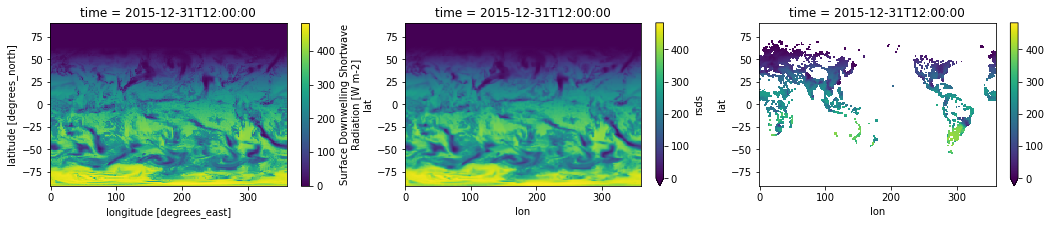

It takes elapsed_time 0.6821205615997314 to plot the layer
It takes elapsed_time 13.272963523864746 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/rsus_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.9351537227630615 to load the data
*********Start to merge*********
It takes elapsed_time 0.03732943534851074 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.025818824768066406 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.93894648551941 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6572470664978027 to mask the layer
*********Start to plot the layer*********


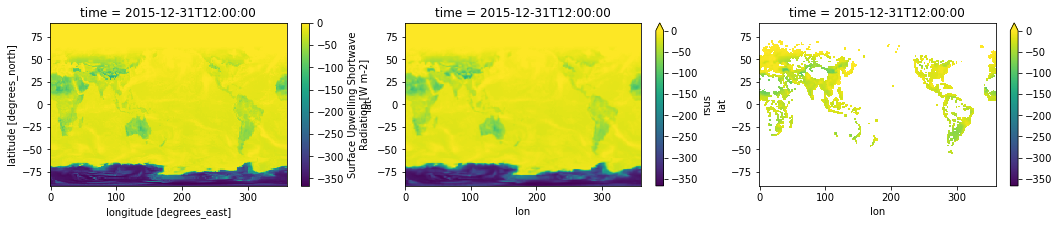

It takes elapsed_time 0.7012906074523926 to plot the layer
It takes elapsed_time 13.29647707939148 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2031, 25)

In [5]:
df = get_urban_df(ds)
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

It takes elapsed_time 30.055854082107544 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

235.09210467338562


# Step 3: 2061-2070 

In [9]:
del ds, df
gc.collect()

175

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/huss_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.9166104793548584 to load the data
*********Start to merge*********
It takes elapsed_time 0.035169124603271484 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.08529472351074219 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.91895341873169 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6548075675964355 to mask the layer
*********Start to plot the layer*********


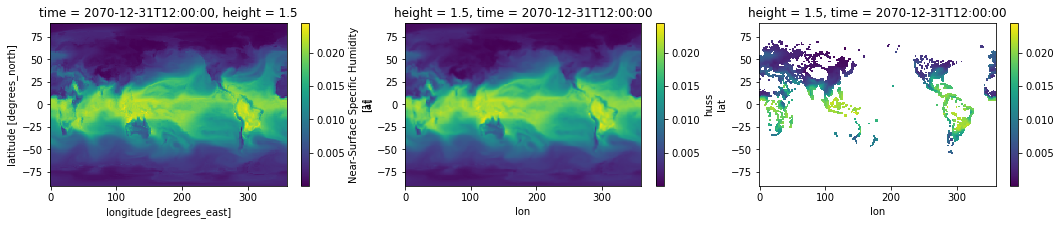

It takes elapsed_time 0.7083923816680908 to plot the layer
It takes elapsed_time 13.320714712142944 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/tas_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.336606979370117 to load the data
*********Start to merge*********
It takes elapsed_time 0.042877197265625 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.08031368255615234 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.926414251327515 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6531164646148682 to mask the layer
*********Start to plot the layer*********


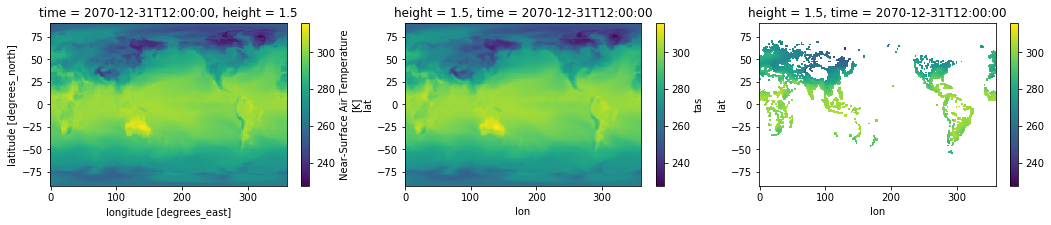

It takes elapsed_time 0.6710178852081299 to plot the layer
It takes elapsed_time 13.711620569229126 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/uas_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.8802244663238525 to load the data
*********Start to merge*********
It takes elapsed_time 0.03712272644042969 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.16048908233642578 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.871821641921997 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6537365913391113 to mask the layer
*********Start to plot the layer*********


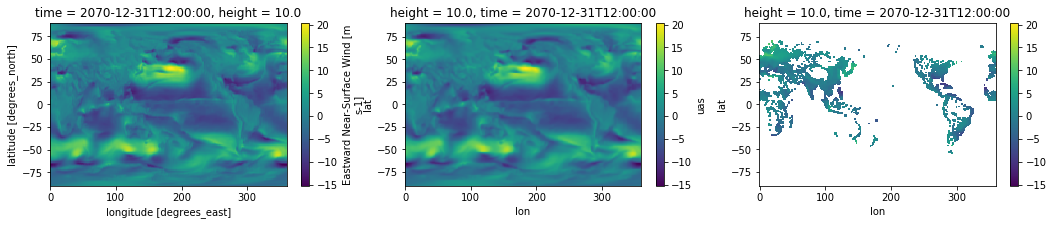

It takes elapsed_time 0.717803955078125 to plot the layer
It takes elapsed_time 13.322525262832642 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/vas_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.0498509407043457 to load the data
*********Start to merge*********
It takes elapsed_time 0.033273935317993164 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_144x192_192x288_peri.nc
It takes elapsed_time 0.026528358459472656 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.858667850494385 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6565775871276855 to mask the layer
*********Start to plot the layer*********


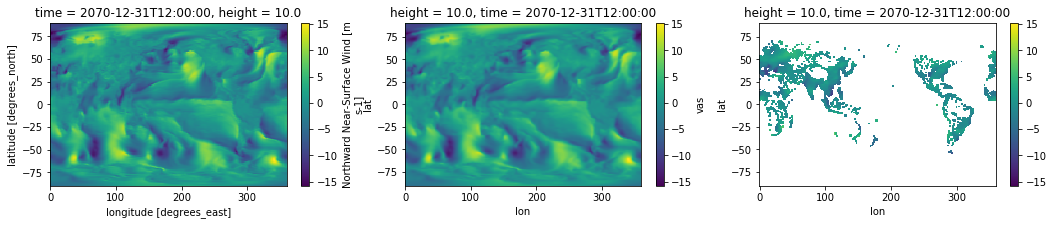

It takes elapsed_time 0.7171661853790283 to plot the layer
It takes elapsed_time 13.34383487701416 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/pr_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.598039388656616 to load the data
*********Start to merge*********
It takes elapsed_time 0.0427396297454834 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.1106879711151123 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.893797636032104 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6482069492340088 to mask the layer
*********Start to plot the layer*********


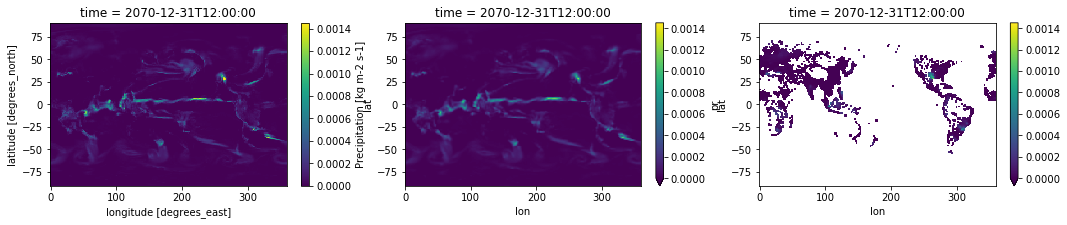

It takes elapsed_time 0.684424638748169 to plot the layer
It takes elapsed_time 13.978921890258789 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/prsn_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.1107170581817627 to load the data
*********Start to merge*********
It takes elapsed_time 0.04588723182678223 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.11909747123718262 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.843531131744385 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6488735675811768 to mask the layer
*********Start to plot the layer*********


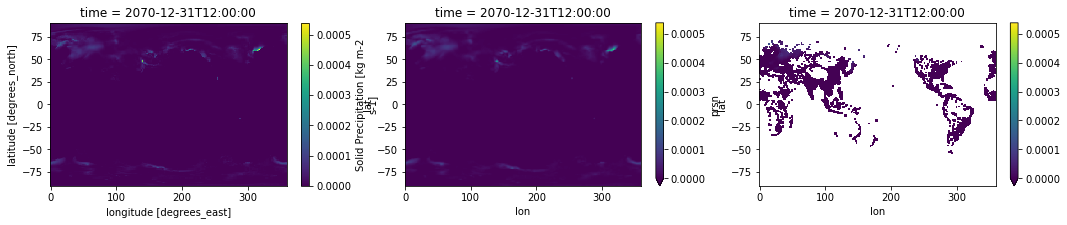

It takes elapsed_time 0.6460628509521484 to plot the layer
It takes elapsed_time 13.415242910385132 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/rlds_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.3759114742279053 to load the data
*********Start to merge*********
It takes elapsed_time 0.04230189323425293 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.028096914291381836 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.884076833724976 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6467404365539551 to mask the layer
*********Start to plot the layer*********


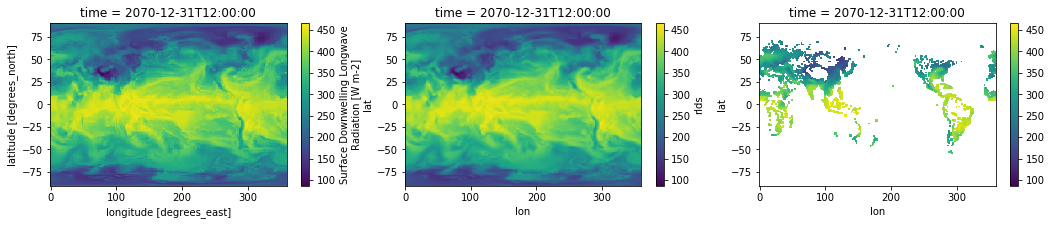

It takes elapsed_time 0.7152981758117676 to plot the layer
It takes elapsed_time 13.69402265548706 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/rlus_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.3625731468200684 to load the data
*********Start to merge*********
It takes elapsed_time 0.04276227951049805 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.028107404708862305 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.844722509384155 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6488943099975586 to mask the layer
*********Start to plot the layer*********


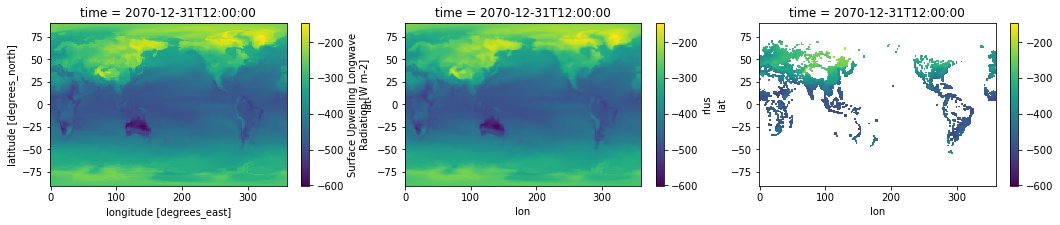

It takes elapsed_time 0.6904888153076172 to plot the layer
It takes elapsed_time 13.618311882019043 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/rsds_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.3056724071502686 to load the data
*********Start to merge*********
It takes elapsed_time 0.04982161521911621 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.02780914306640625 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 9.925725221633911 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6530280113220215 to mask the layer
*********Start to plot the layer*********


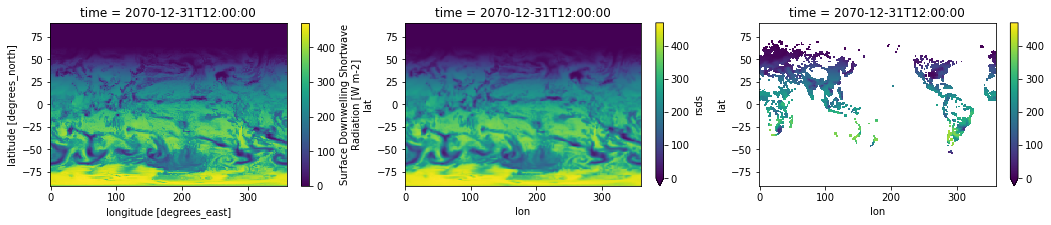

It takes elapsed_time 0.6939787864685059 to plot the layer
It takes elapsed_time 13.657106161117554 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/ACCESS1-0/rsus_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.343648910522461 to load the data
*********Start to merge*********
It takes elapsed_time 0.05281972885131836 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_145x192_192x288_peri.nc
It takes elapsed_time 0.028328657150268555 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.108448266983032 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6576709747314453 to mask the layer
*********Start to plot the layer*********


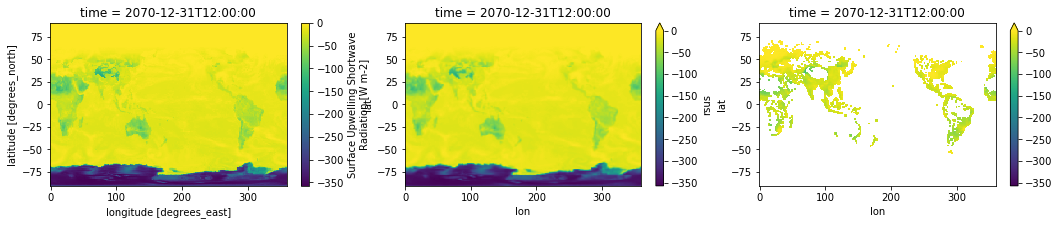

It takes elapsed_time 0.7008790969848633 to plot the layer
It takes elapsed_time 13.892582893371582 to deal with rsus in total
******End rsus******




In [10]:
ds = get_ds_2061(2056, 2081, 25)

In [11]:
df = get_urban_df(ds)
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

It takes elapsed_time 29.34663438796997 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

235.7060890197754
